In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Inspecting Quantity Column

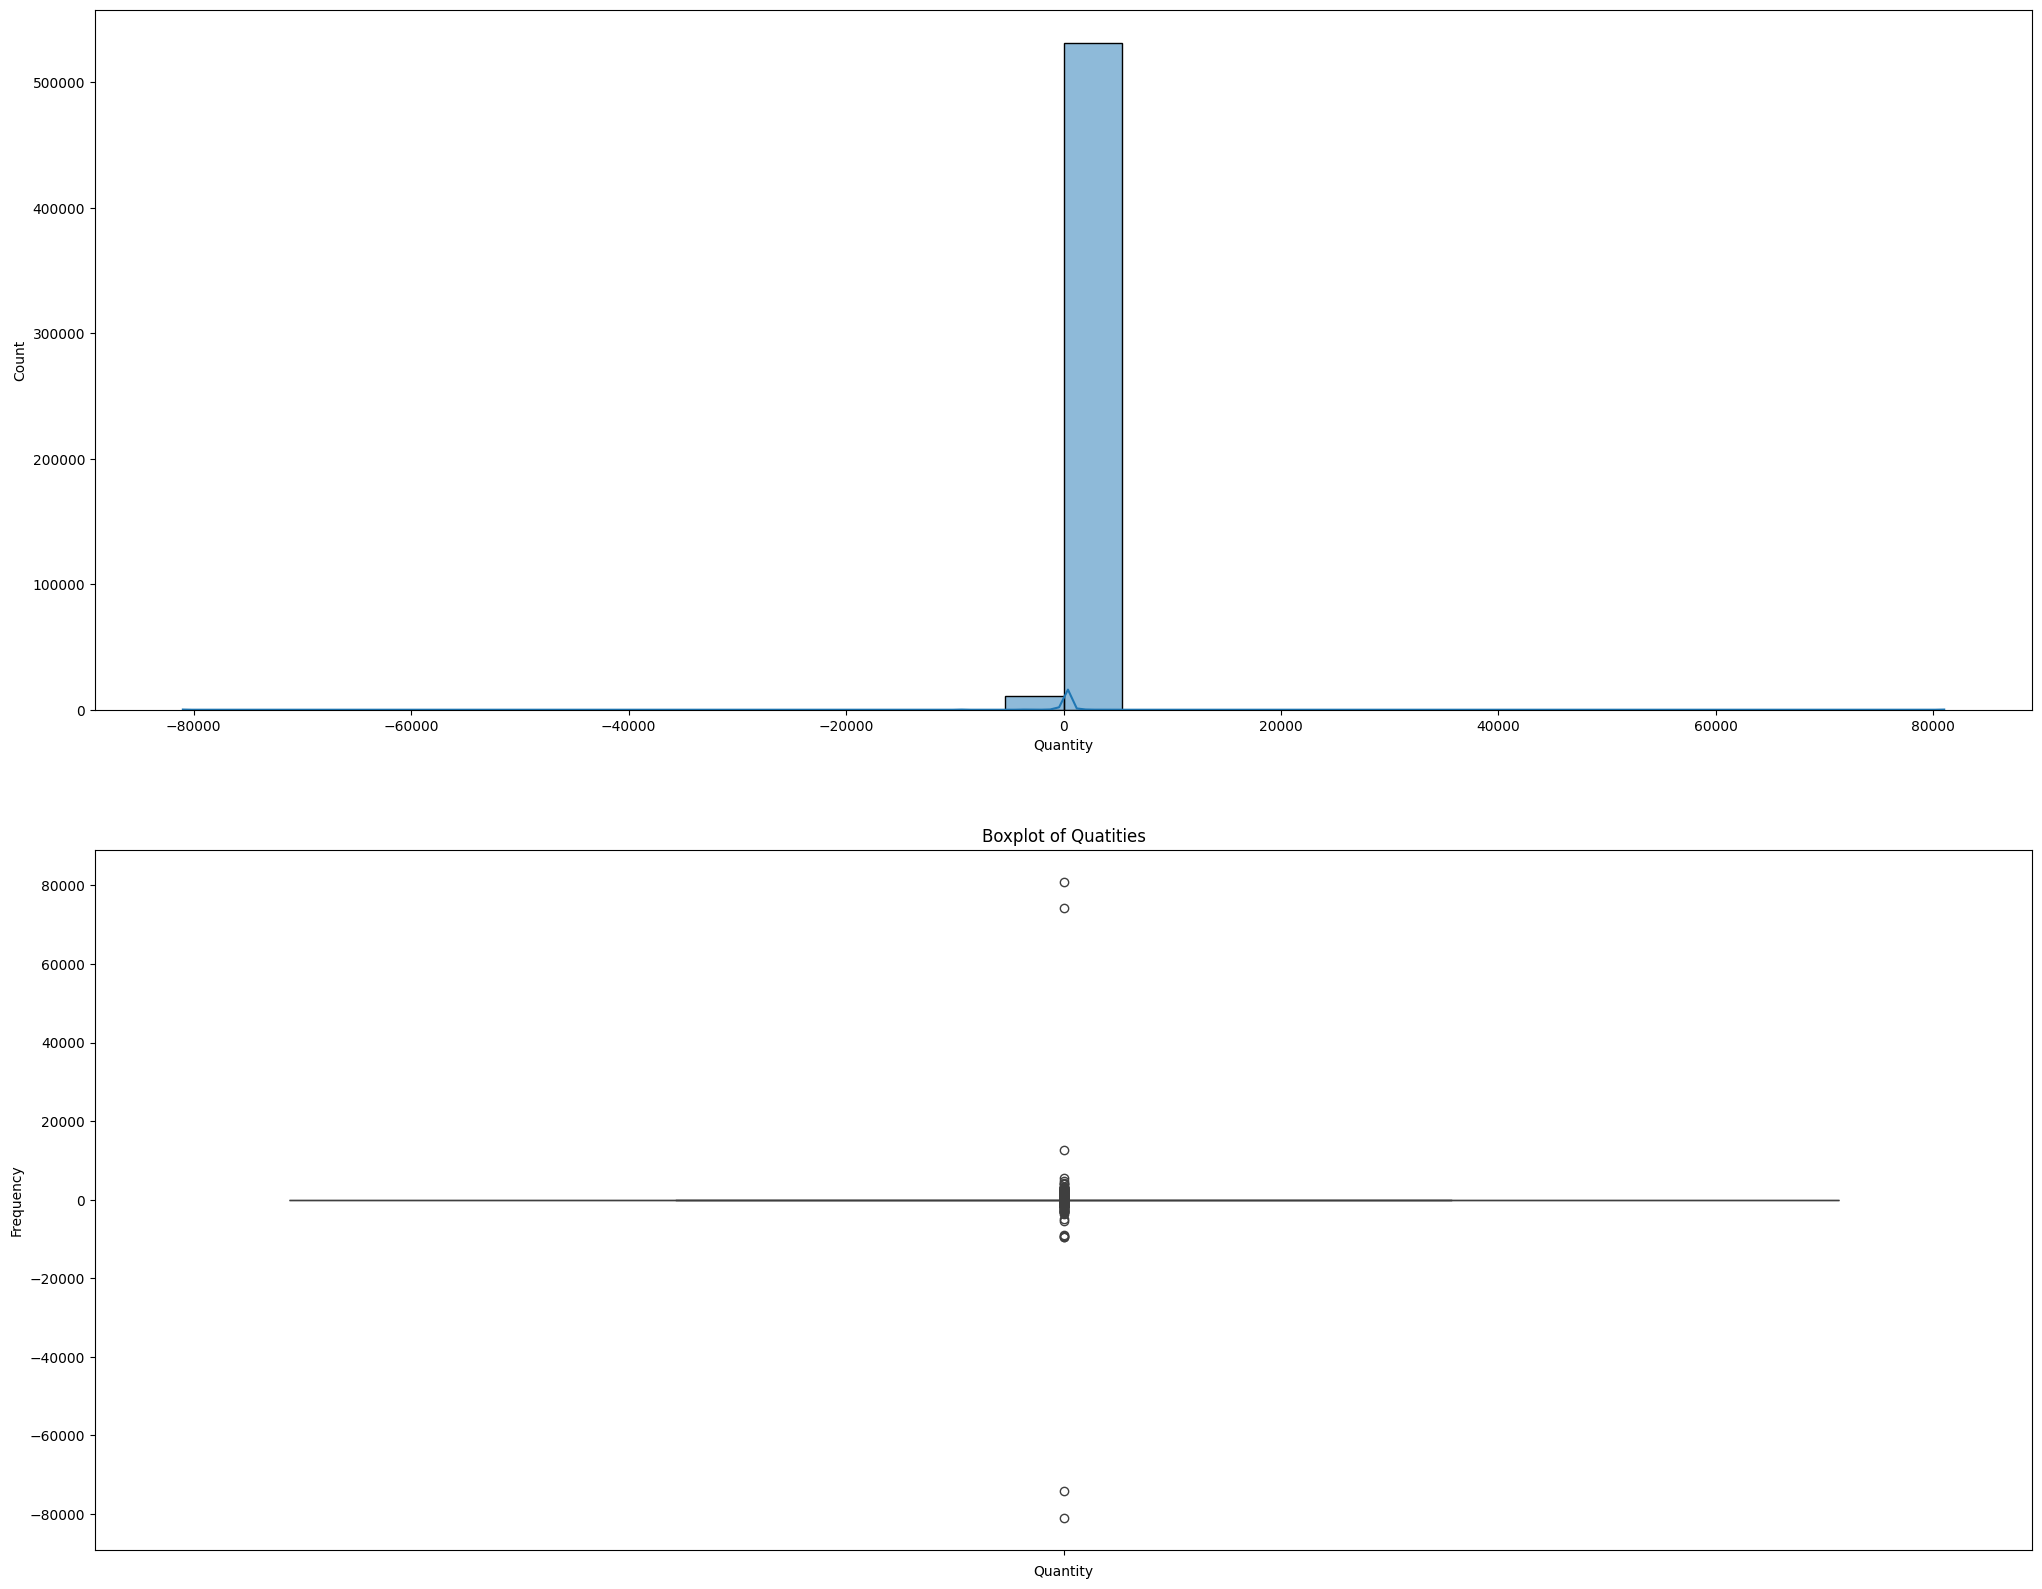

In [5]:
_, axes = plt.subplots(2,1 , figsize=(25,20))

sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Quatities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

sns.boxplot(data['Quantity'], ax=axes[1])
plt.title('Boxplot of Quatities')
plt.xlabel('Quantity')


plt.show()

In [6]:
quantity_counts = pd.Series(data['Quantity'].value_counts())
quantity_counts.head(20)

Quantity
 1      148227
 2       81829
 12      61063
 6       40868
 4       38484
 3       37121
 24      24021
 10      22288
 8       13129
 5       11757
 48       6068
 25       5124
 20       5019
 16       4266
-1        4184
 36       3822
 7        2914
 9        2037
 72       1946
 100      1819
Name: count, dtype: int64

In [7]:
data = data[(data['Quantity'] >= 0) & (data['Quantity'] <= 25)]


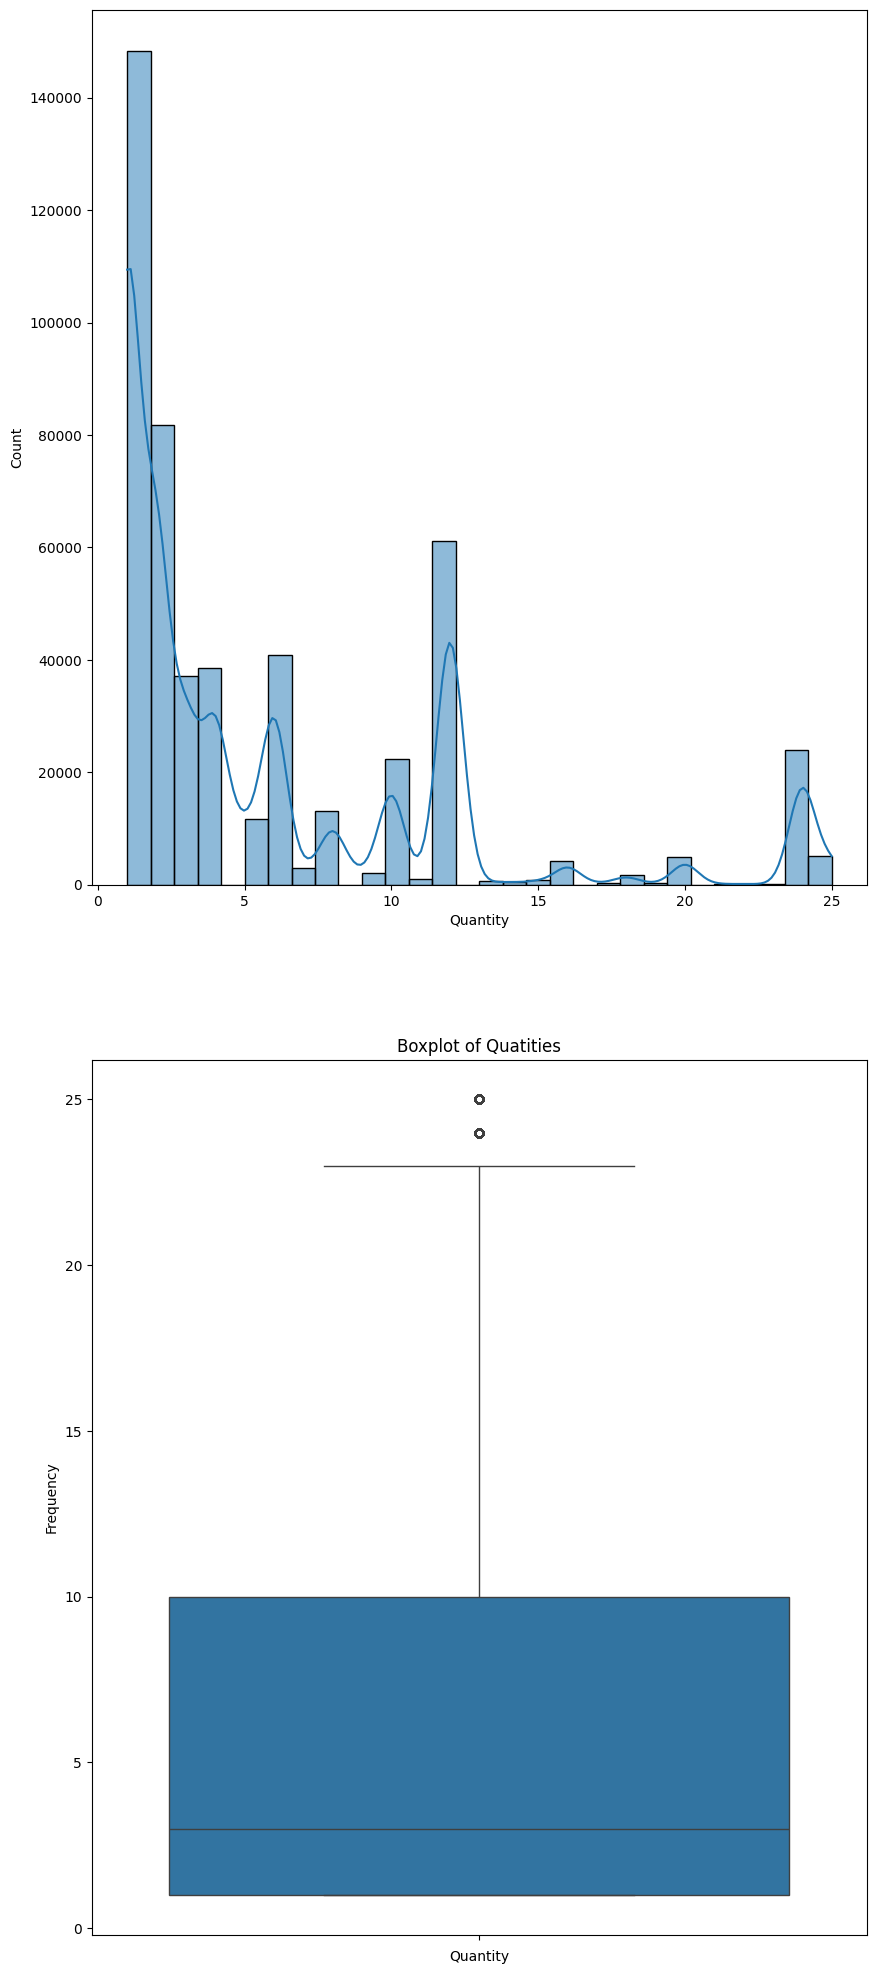

In [8]:
_, axes = plt.subplots(2,1 , figsize=(10, 25))

sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Quatities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

sns.boxplot(data['Quantity'], ax=axes[1])
plt.title('Boxplot of Quatities')
plt.xlabel('Quantity')


plt.show()

## Inspecting Country Column

In [9]:
unique_countries = data['Country'].unique()
print(unique_countries)


['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Poland' 'Portugal' 'Italy' 'Belgium' 'Lithuania'
 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Spain' 'Cyprus' 'Finland'
 'Austria' 'Sweden' 'Israel' 'Greece' 'Hong Kong' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


## Inspecting Unit Price Column

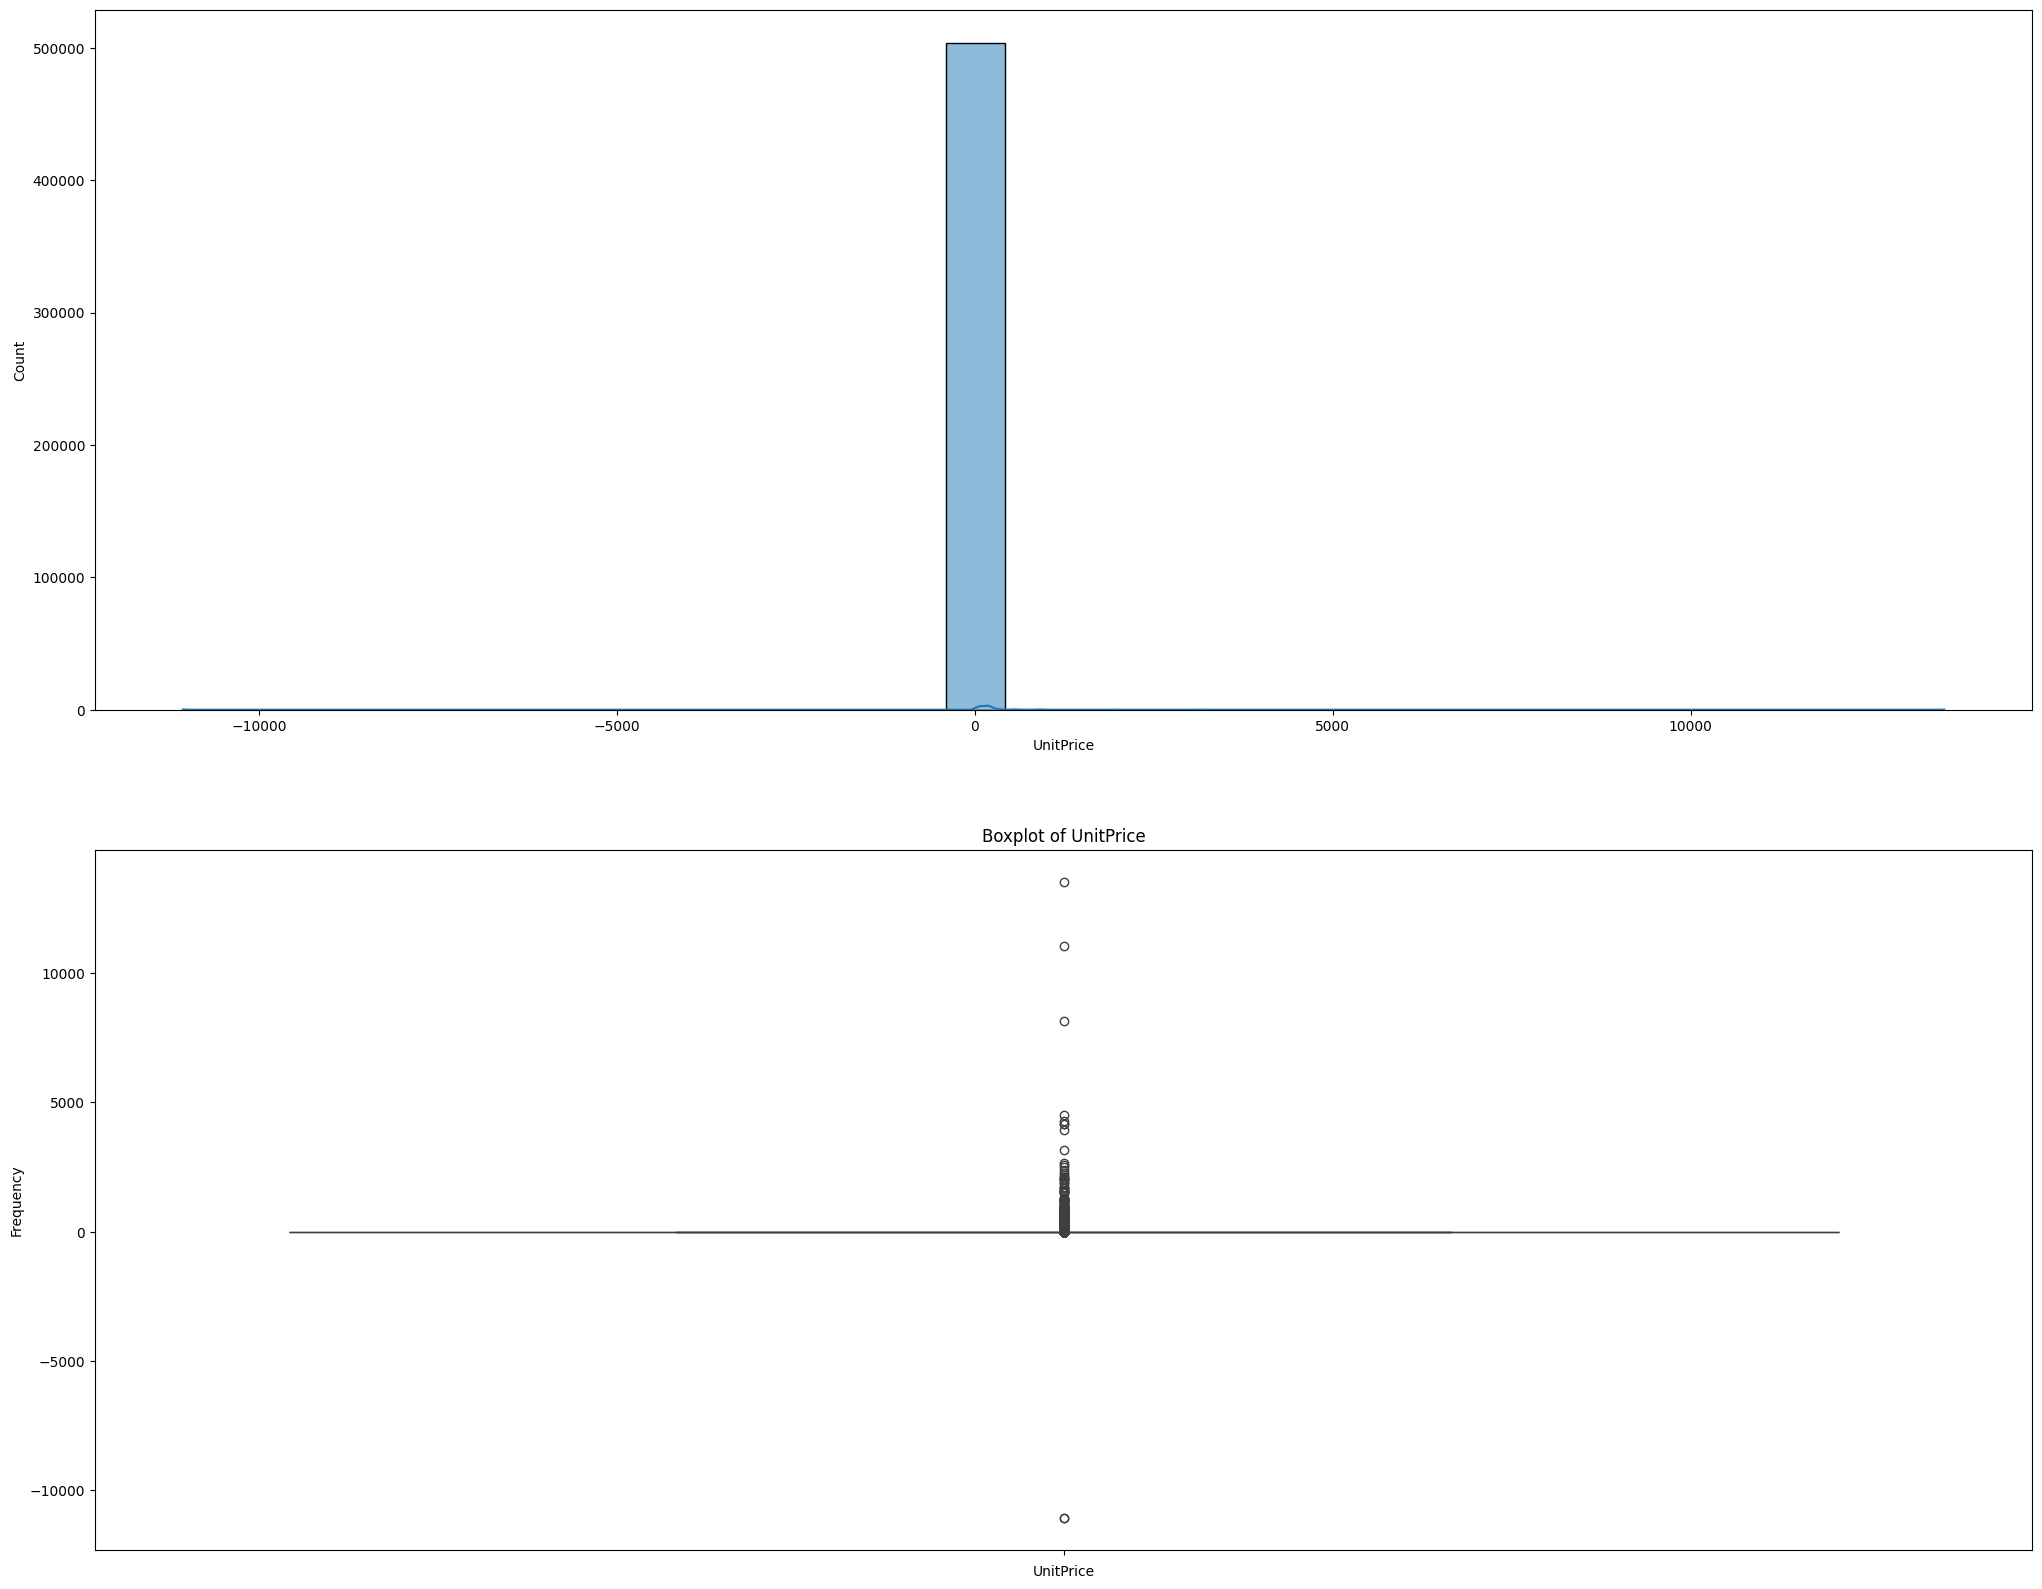

In [10]:
_, axes = plt.subplots(2,1 , figsize=(25,20))

sns.histplot(data['UnitPrice'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

sns.boxplot(data['UnitPrice'], ax=axes[1])
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')


plt.show()

In [11]:
data = data[(data['UnitPrice'] >= 0)]


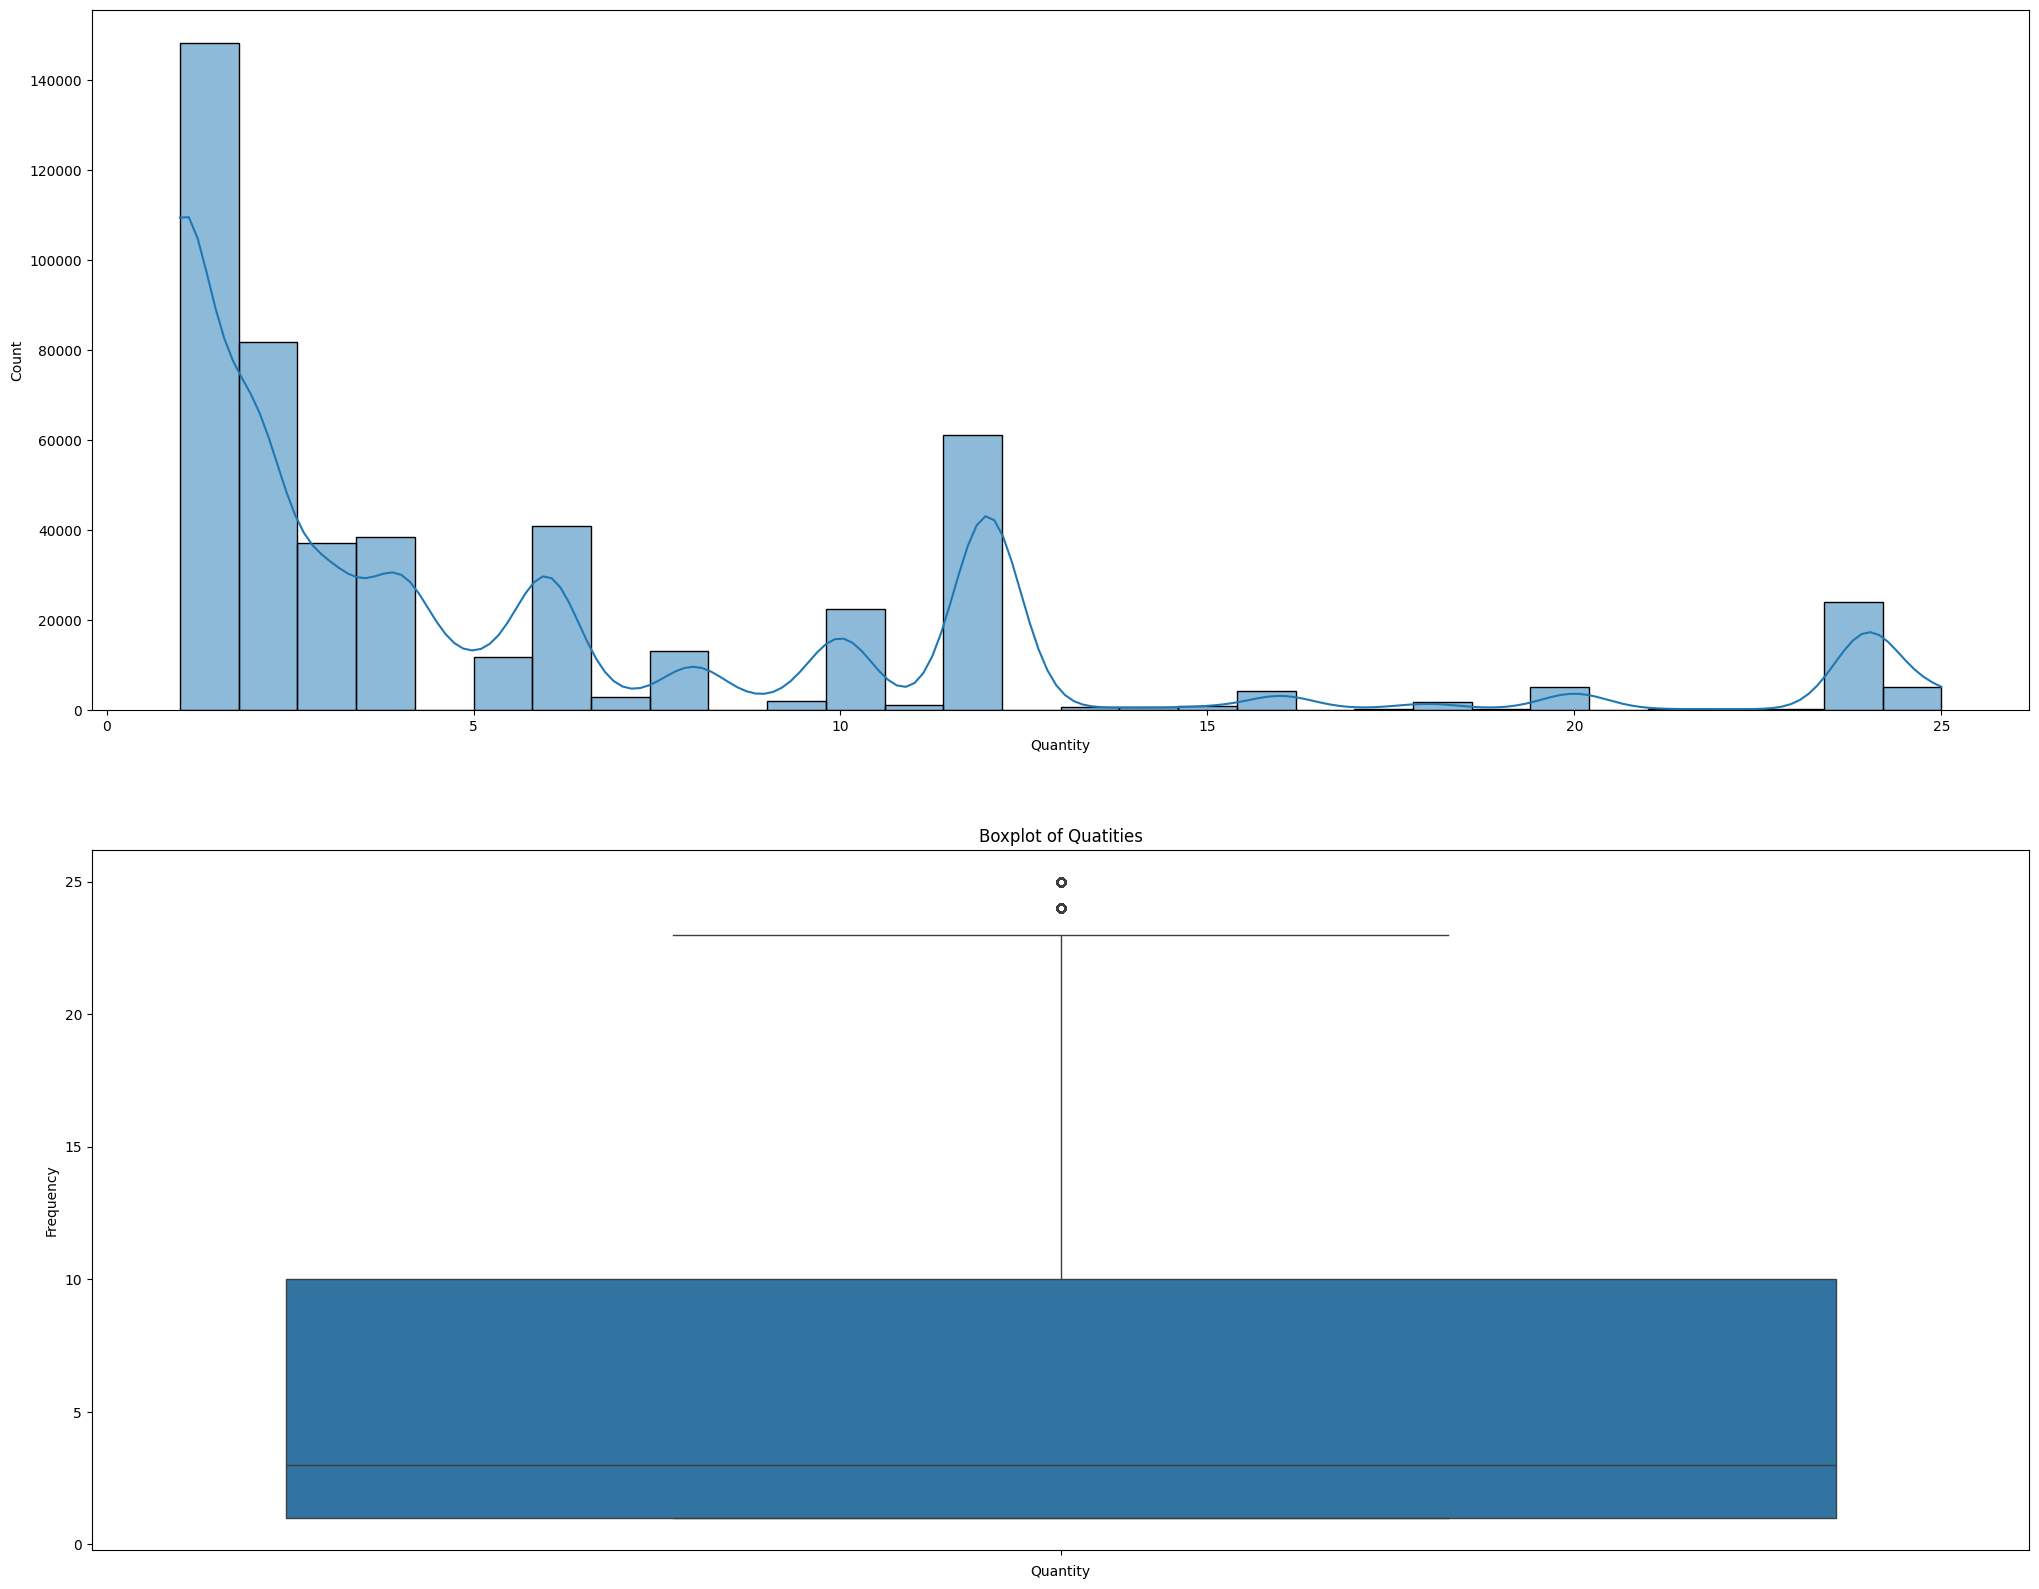

In [12]:
_, axes = plt.subplots(2,1 , figsize=(25,20))

sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Quatities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

sns.boxplot(data['Quantity'], ax=axes[1])
plt.title('Boxplot of Quatities')
plt.xlabel('Quantity')


plt.show()

## Handling Missing Values in CutomerID Column

In [13]:
unique_customer_ids = pd.Series(data['CustomerID'].unique()).sort_values()
print(unique_customer_ids)


382     12347.0
777     12348.0
4107    12349.0
1297    12350.0
1440    12352.0
         ...   
2728    18281.0
3099    18282.0
878     18283.0
2565    18287.0
59          NaN
Length: 4239, dtype: float64


In [14]:
data.dropna(subset=['CustomerID'], inplace=True)

In [15]:
unique_customer_ids = pd.Series(data['CustomerID'].unique()).sort_values()
print(unique_customer_ids)

381     12347.0
776     12348.0
4106    12349.0
1296    12350.0
1439    12352.0
         ...   
1705    18280.0
2727    18281.0
3098    18282.0
877     18283.0
2564    18287.0
Length: 4238, dtype: float64


## Feature Engineering

In [16]:
# Purchase History
purchase_history = pd.Series(data.groupby('CustomerID')['InvoiceNo'].nunique())
purchase_history.head()

CustomerID
12347.0    7
12348.0    4
12349.0    1
12350.0    1
12352.0    8
Name: InvoiceNo, dtype: int64

In [17]:
# Order Frequency
order_frequency = pd.Series(data.groupby('CustomerID')['InvoiceDate'].apply(lambda x: x.diff().mean().days))
order_frequency.head()

CustomerID
12347.0     2.0
12348.0    31.0
12349.0     0.0
12350.0     0.0
12352.0     3.0
Name: InvoiceDate, dtype: float64

In [18]:
# Total Spending
total_spending = pd.Series(data.groupby('CustomerID')['UnitPrice'].sum())
total_spending.head()

CustomerID
12347.0     468.98
12348.0     163.90
12349.0     602.60
12350.0      65.30
12352.0    1354.11
Name: UnitPrice, dtype: float64

In [19]:
# Recency of Purchase
recency_of_purchase = pd.Series((data['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days)
recency_of_purchase.head()

CustomerID
12347.0      1
12348.0     74
12349.0     18
12350.0    309
12352.0     35
Name: InvoiceDate, dtype: int64

In [20]:
# Average Basket Size
average_basket_size = pd.Series(data.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].sum().groupby('CustomerID').mean())
average_basket_size.head()

CustomerID
12347.0    274.857143
12348.0     37.250000
12349.0    559.000000
12350.0    197.000000
12352.0     67.000000
Name: Quantity, dtype: float64

In [21]:
# Country
country = pd.Series(data.groupby('CustomerID')['Country'].apply(lambda x: x.mode()))
country.head()

CustomerID   
12347.0     0    Iceland
12348.0     0    Finland
12349.0     0      Italy
12350.0     0     Norway
12352.0     0     Norway
Name: Country, dtype: object

In [22]:
print(purchase_history.index)

Index([12347.0, 12348.0, 12349.0, 12350.0, 12352.0, 12353.0, 12354.0, 12355.0,
       12356.0, 12357.0,
       ...
       18273.0, 18274.0, 18276.0, 18277.0, 18278.0, 18280.0, 18281.0, 18282.0,
       18283.0, 18287.0],
      dtype='float64', name='CustomerID', length=4238)


In [23]:
customerID = pd.Series(purchase_history.index)
print(customerID)

0       12347.0
1       12348.0
2       12349.0
3       12350.0
4       12352.0
         ...   
4233    18280.0
4234    18281.0
4235    18282.0
4236    18283.0
4237    18287.0
Name: CustomerID, Length: 4238, dtype: float64


In [24]:
# Create a new DataFrame to store the extracted features
fe_data = pd.DataFrame({
    'CustomerID': customerID,
    'PurchaseHistory': purchase_history.values,
    'OrderFrequency': order_frequency.values,
    'TotalSpending': total_spending.values,
    'RecencyOfPurchase': recency_of_purchase.values,
    'AverageBasketSize': average_basket_size.values,
    'Country': country.values
})

# Display the customer features
fe_data.head(10)


,CustomerID,PurchaseHistory,OrderFrequency,TotalSpending,RecencyOfPurchase,AverageBasketSize,Country
0,12347.0,7,2.0,468.98,1,274.857143,Iceland
1,12348.0,4,31.0,163.90,74,37.250000,Finland
2,12349.0,1,0.0,602.60,18,559.000000,Italy
3,12350.0,1,0.0,65.30,309,197.000000,Norway
4,12352.0,8,3.0,1354.11,35,67.000000,Norway
5,12353.0,1,0.0,24.30,203,20.000000,Bahrain
6,12354.0,1,0.0,256.14,231,402.000000,Spain
7,12355.0,1,0.0,52.15,213,84.000000,Bahrain
8,12356.0,3,7.0,172.78,22,207.666667,Portugal
9,12357.0,1,0.0,398.90,32,1694.000000,Switzerland
